Our needs for our model include:
- This needs to be a model able to process labels and predict prices based on different attributes.
- Needs to predict fair market values of properties
- Due to the dataset we plan to use for this project + the predictive nature of what I need, we will be using a supervised regressor model for the price baseline calculation.
- This will allow us to create a general price baseline so that we can detect any major anomalies in the dataset for any anomalous pricing using predictive modeling
- This model ideally should be able to catch nonlinear and linear relationships, as these would be the best 

Possible Models/Algorithms:
- Ridge Regression: This is a linear regressor that penalizes large coefficients; this regressor focuses primarily on linear relationships and acts as a simple model for these relationships; however, it fails to capture nonlinear relationships well, and with the varying attributes of homes could be a major disadvantage
- Random Forest Regressor: This is a regression model related to the popular Random Forest algorithm, using various trees to make classifications and regressions based on supervised learning concepts. This is more suited for nonlinear data models and are more suited for complex patterns. However, these are more susceptible to overfitting due to tree depth as well as slowing down the pipeline due to a more slow model to train.
- LightGBM/XGBoost Regressor: This is a popular gradient boosting type regression model that focuses on capturing more subtle changes and more non-distributed variances. This generally has a higher accuracy and builds on top of each tree's predictions. This is a faster model then its counterpart, XGBoost, which does similar regressive analysis, but trades computative cost for accuracy.

To decide between these various regressors, we have also created metric analysis code in order to do metric analysis and comparison to decide the best models to use for our dataset; Before this though, a few main patterns; due to data processing, these are generally non-linear, so therefore that means XGBoost/LightGBM (gradient regressors) or Random Forest Regressors have a much more likely chance of being useful due to their usage for nonlinear operations and predictive modeling.

In [1]:
%pip install lightgbm
%pip install xgboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

df_filled = pd.read_csv("../preprocessing/train_cleaned.csv")

target = 'SalePrice'
cols_to_exclude = [target, "Id"]
features = [col for col in df_filled.select_dtypes(include=[np.number]).columns 
            if col not in cols_to_exclude]

X = df_filled[features]
y = df_filled[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Average property price: ${y_test.mean():,.0f}")

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Average property price: $178,840


In [2]:
print("\nActual features used:", features)


Actual features used: ['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'MiscVal', 'MoSold', 'YrSold', 'MiscFeature_Gar2', 'MiscFeature_Othr', 'MiscFeature_Shed', 'MiscFeature_TenC', 'Alley_Grvl', 'Alley_Pave', 'Fence_GdPrv', 'Fence_GdWo', 'Fence_MnPrv', 'Fence_MnWw', 'MasVnrType_BrkCmn', 

In [3]:
correlations = df_filled.corr()['SalePrice'].sort_values(ascending=False)
print(correlations.head(15))

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
ExterQual       0.682639
KitchenQual     0.659600
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
BsmtQual        0.585207
FullBath        0.560664
GarageFinish    0.549247
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
FireplaceQu     0.520438
Name: SalePrice, dtype: float64


In [4]:
# evaluation function
def evaluate_model(y_acc, y_pred, model):
    mae = mean_absolute_error(y_acc, y_pred)
    mse = mean_squared_error(y_acc, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_acc, y_pred)
    mape = np.mean(np.abs((y_acc - y_pred) / y_acc)) * 100
    
    print(f"{model} Performance:")
    print(f"  R² Score: {r2:.4f}")
    print(f"  RMSE: ${rmse:,.2f}")
    print(f"  MAE: ${mae:,.2f}")
    print(f"  MAPE: {mape:.2f}%")
    print(f"  RMSE as % of avg price: {(rmse / y_acc.mean()) * 100:.2f}%")

In [5]:
# here, models for price prediction will be trained using their library counterparts, and from there, dependent on the errors 
# and r^2 score, we would decide which one is best through data analysis and the eval function

# Linear Regressor
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_lr_pred = lr.predict(X_test_scaled)

evaluate_model(y_test, y_lr_pred, "Linear Regression")

Linear Regression Performance:
  R² Score: 0.8827
  RMSE: $29,998.07
  MAE: $19,850.90
  MAPE: 12.11%
  RMSE as % of avg price: 16.77%


In [6]:
print(f"y_test sample values: {y_test.head().values}")
print(f"y_test mean: ${y_test.mean():,.0f}")

y_test sample values: [154500 325000 115000 159000 315500]
y_test mean: $178,840


In [7]:
# Ridge Regressor
ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(X_train_scaled, y_train)
y_ridge_pred = ridge.predict(X_test_scaled)

evaluate_model(y_test, y_ridge_pred, "Ridge Regression")

Ridge Regression Performance:
  R² Score: 0.8828
  RMSE: $29,980.22
  MAE: $19,810.05
  MAPE: 12.08%
  RMSE as % of avg price: 16.76%


In [8]:
# Random Forest w/ RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

rf_params = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [5, 10, 15, 20, 25, 30, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8]
}


rand_for = RandomizedSearchCV(RandomForestRegressor(random_state=42, n_jobs=-1), param_distributions=rf_params, n_iter=100, cv=5, scoring='r2', n_jobs=-1)
rand_for.fit(X_train, y_train)
best_rf = rand_for.best_estimator_
print(f"Best CV R²: {rand_for.best_score_:.4f}")
print(f"Best params: {rand_for.best_params_}")
y_rf_pred = best_rf.predict(X_test)
evaluate_model(y_test, y_rf_pred, "Random Forest")

Best CV R²: 0.8408
Best params: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 25}
Random Forest Performance:
  R² Score: 0.8892
  RMSE: $29,148.24
  MAE: $17,382.02
  MAPE: 10.50%
  RMSE as % of avg price: 16.30%


In [9]:
rand_for = RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_depth=25)
rand_for.fit(X_train, y_train)
y_rf_pred = rand_for.predict(X_test)

evaluate_model(y_test, y_rf_pred, "Random Forest")

Random Forest Performance:
  R² Score: 0.8938
  RMSE: $28,545.64
  MAE: $17,281.11
  MAPE: 10.53%
  RMSE as % of avg price: 15.96%


In [10]:
# Gradient Boosting
gbr_params = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 15),
    'learning_rate': uniform(0.01, 0.3)
}
gbr = RandomizedSearchCV(GradientBoostingRegressor(random_state=42), param_distributions=gbr_params, n_iter=100, cv=5, scoring='r2', n_jobs=-1)
gbr.fit(X_train, y_train)
best_gbr = gbr.best_estimator_
print(f"Best CV R²: {gbr.best_score_:.4f}")
print(f"Best params: {gbr.best_params_}")
y_gbr_pred = best_gbr.predict(X_test)
evaluate_model(y_test, y_gbr_pred, "Gradient Boosting")

Best CV R²: 0.8756
Best params: {'learning_rate': np.float64(0.05217265145784607), 'max_depth': 4, 'n_estimators': 799}
Gradient Boosting Performance:
  R² Score: 0.9028
  RMSE: $27,310.60
  MAE: $16,168.00
  MAPE: 9.75%
  RMSE as % of avg price: 15.27%


In [11]:
gbr = GradientBoostingRegressor(random_state=42, learning_rate=0.05263727095314413, max_depth=4, n_estimators=604)
gbr.fit(X_train, y_train)
y_gbr_pred = gbr.predict(X_test)

evaluate_model(y_test, y_gbr_pred, "Gradient Boosting")

Gradient Boosting Performance:
  R² Score: 0.9133
  RMSE: $25,791.15
  MAE: $15,825.54
  MAPE: 9.59%
  RMSE as % of avg price: 14.42%


In [12]:
# LightGBM

lgbm_params = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 15),
    'learning_rate': uniform(0.01, 0.3),
    'num_leaves': randint(10, 100)
}
lgbm = RandomizedSearchCV(LGBMRegressor(random_state=42, n_jobs=-1), param_distributions=lgbm_params, n_iter=100, cv=5, scoring='r2', n_jobs=-1)
lgbm.fit(X_train, y_train)
best_lgbm = lgbm.best_estimator_
print(f"Best CV R²: {lgbm.best_score_:.4f}")
print(f"Best params: {lgbm.best_params_}")
y_lgbm_pred = best_lgbm.predict(X_test)
evaluate_model(y_test, y_lgbm_pred, "LightGBM")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002303 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3164
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 136
[LightGBM] [Info] Start training from score 181441.541952
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

In [13]:
lgbm = LGBMRegressor(random_state=42)
lgbm.fit(X_train, y_train)
y_lgbm_pred = lgbm.predict(X_test)

evaluate_model(y_test, y_lgbm_pred, "LightGBM")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001261 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3164
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 136
[LightGBM] [Info] Start training from score 181441.541952
LightGBM Performance:
  R² Score: 0.8892
  RMSE: $29,148.90
  MAE: $17,238.69
  MAPE: 10.39%
  RMSE as % of avg price: 16.30%


In [14]:
# XGBoost

xgb_params = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 15),
    'learning_rate': uniform(0.01, 0.3)
}
xgb = RandomizedSearchCV(XGBRegressor(random_state=42, n_jobs=-1), param_distributions=xgb_params, n_iter=100, cv=5, scoring='r2', n_jobs=-1)
xgb.fit(X_train, y_train)
best_xgb = xgb.best_estimator_
print(f"Best CV R²: {xgb.best_score_:.4f}")
print(f"Best params: {xgb.best_params_}")
y_xgb_pred = best_xgb.predict(X_test)
evaluate_model(y_test, y_xgb_pred, "XGB Regressor")

Best CV R²: 0.8672
Best params: {'learning_rate': np.float64(0.07001802283701665), 'max_depth': 3, 'n_estimators': 841}
XGB Regressor Performance:
  R² Score: 0.9144
  RMSE: $25,618.20
  MAE: $15,871.27
  MAPE: 9.64%
  RMSE as % of avg price: 14.32%


In [15]:
xgb = XGBRegressor(random_state=42, learning_rate=0.11867256756808066, max_depth=3, n_estimators=575)
xgb.fit(X_train, y_train)
y_xgb_pred = xgb.predict(X_test)

evaluate_model(y_test, y_xgb_pred, "XGB Regressor")

XGB Regressor Performance:
  R² Score: 0.9104
  RMSE: $26,221.36
  MAE: $15,815.70
  MAPE: 9.35%
  RMSE as % of avg price: 14.66%


In [16]:
#Experimentation w Meta + Ensemble Models

base_models = [
    ('ridge', Ridge(alpha=1.0, random_state=42)),
    ('gb', GradientBoostingRegressor(random_state=42, learning_rate=0.048055927919608624, max_depth=4, n_estimators=596)),
    ('xgb', XGBRegressor(random_state=42, verbosity=0))
]

meta_model = GradientBoostingRegressor(random_state=42) 

stacking = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True, 
    cv=5
)

stacking.fit(X_train_scaled, y_train)
y_stacking_pred = stacking.predict(X_test_scaled)

evaluate_model(y_test, y_stacking_pred, "Stacking Ensemble")



Stacking Ensemble Performance:
  R² Score: 0.8970
  RMSE: $28,110.15
  MAE: $15,235.29
  MAPE: 9.08%
  RMSE as % of avg price: 15.72%


Price Prediction to Anomaly Detection

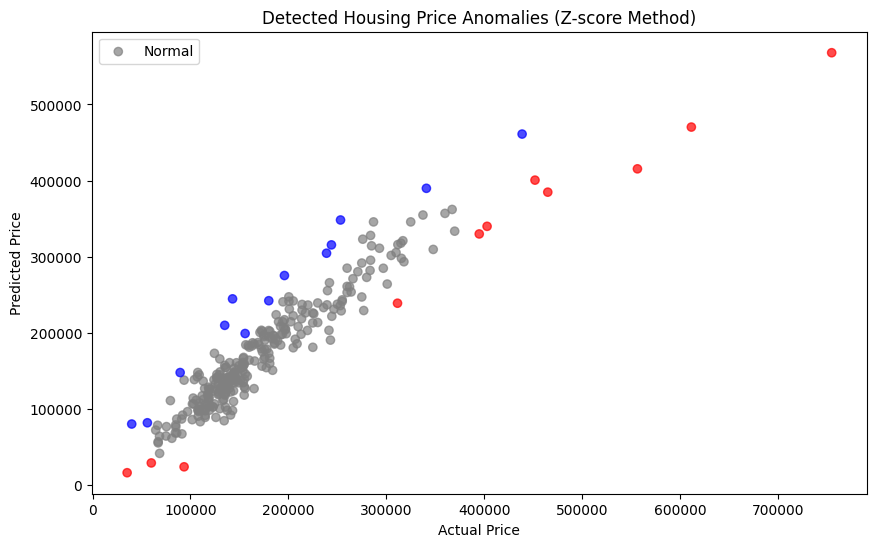

In [22]:
from models import detect_anomalies

anomalies_z = detect_anomalies(y_test, y_lr_pred, method="ensemble")

anomalies_z.head(10)

anomalies_if = detect_anomalies(y_test, y_lr_pred, method="isolation_forest", contamination=0.05)
anomalies_if.head(10)

plt.figure(figsize=(10,6))
plt.scatter(anomalies_z["Actual_Price"], anomalies_z["Predicted_Price"],
            c=np.where(anomalies_z["Ensemble_Label"]=="Normal", "gray",
            np.where(anomalies_z["Ensemble_Label"]=="Overpriced", "red", "blue")),
            alpha=0.7)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Detected Housing Price Anomalies (Z-score Method)")
plt.legend(["Normal", "Overpriced", "Underpriced"])
plt.show()

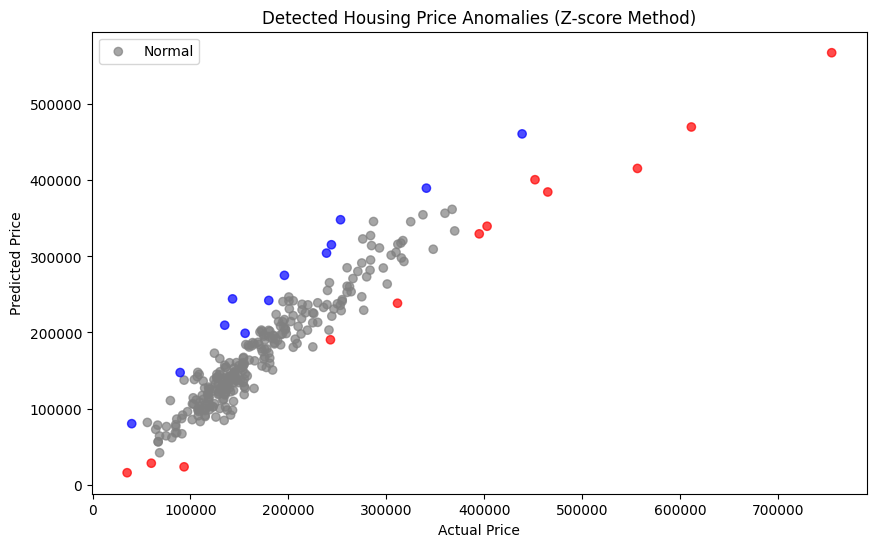

In [25]:
from models import detect_anomalies

anomalies_z = detect_anomalies(y_test, y_ridge_pred, method="ensemble")

anomalies_z.head(10)

anomalies_if = detect_anomalies(y_test, y_ridge_pred, method="isolation_forest", contamination=0.05)
anomalies_if.head(10)

plt.figure(figsize=(10,6))
plt.scatter(anomalies_z["Actual_Price"], anomalies_z["Predicted_Price"],
            c=np.where(anomalies_z["Ensemble_Label"]=="Normal", "gray",
            np.where(anomalies_z["Ensemble_Label"]=="Overpriced", "red", "blue")),
            alpha=0.7)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Detected Housing Price Anomalies (Z-score Method)")
plt.legend(["Normal", "Overpriced", "Underpriced"])
plt.show()

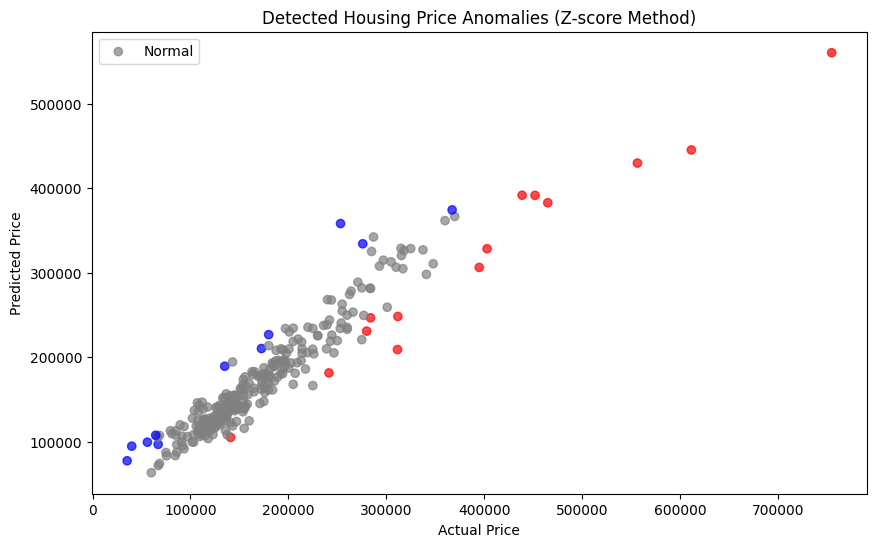

In [26]:
from models import detect_anomalies

anomalies_z = detect_anomalies(y_test, y_rf_pred, method="ensemble")

anomalies_z.head(10)

anomalies_if = detect_anomalies(y_test, y_rf_pred, method="isolation_forest", contamination=0.05)
anomalies_if.head(10)

plt.figure(figsize=(10,6))
plt.scatter(anomalies_z["Actual_Price"], anomalies_z["Predicted_Price"],
            c=np.where(anomalies_z["Ensemble_Label"]=="Normal", "gray",
            np.where(anomalies_z["Ensemble_Label"]=="Overpriced", "red", "blue")),
            alpha=0.7)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Detected Housing Price Anomalies (Z-score Method)")
plt.legend(["Normal", "Overpriced", "Underpriced"])
plt.show()

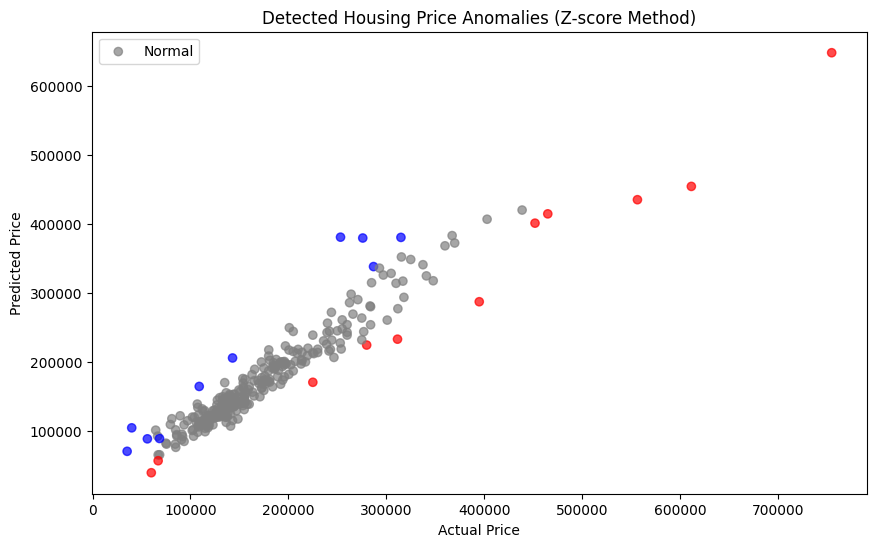

In [27]:
from models import detect_anomalies

anomalies_z = detect_anomalies(y_test, y_gbr_pred, method="ensemble")

anomalies_z.head(10)

anomalies_if = detect_anomalies(y_test, y_gbr_pred, method="isolation_forest", contamination=0.05)
anomalies_if.head(10)

plt.figure(figsize=(10,6))
plt.scatter(anomalies_z["Actual_Price"], anomalies_z["Predicted_Price"],
            c=np.where(anomalies_z["Ensemble_Label"]=="Normal", "gray",
            np.where(anomalies_z["Ensemble_Label"]=="Overpriced", "red", "blue")),
            alpha=0.7)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Detected Housing Price Anomalies (Z-score Method)")
plt.legend(["Normal", "Overpriced", "Underpriced"])
plt.show()

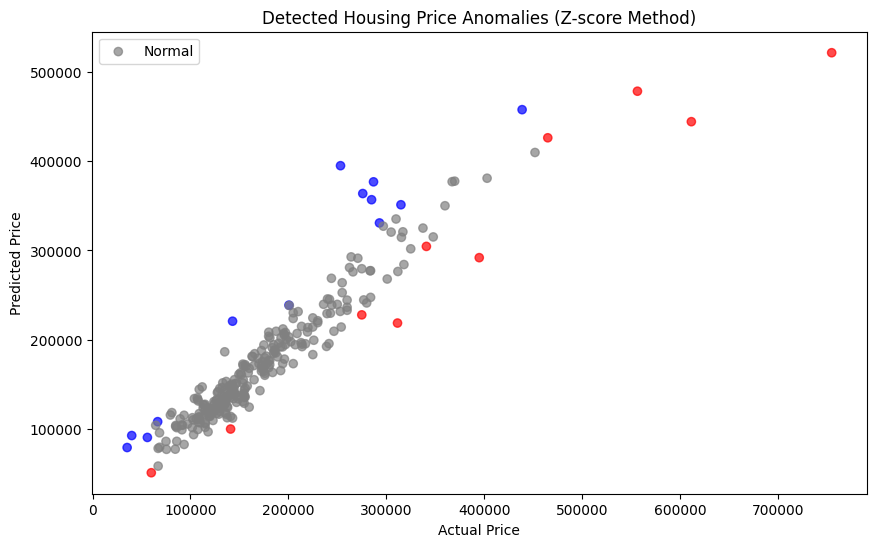

In [29]:
from models import detect_anomalies

anomalies_z = detect_anomalies(y_test, y_lgbm_pred, method="ensemble")

anomalies_z.head(10)

anomalies_if = detect_anomalies(y_test, y_lgbm_pred, method="isolation_forest", contamination=0.05)
anomalies_if.head(10)

plt.figure(figsize=(10,6))
plt.scatter(anomalies_z["Actual_Price"], anomalies_z["Predicted_Price"],
            c=np.where(anomalies_z["Ensemble_Label"]=="Normal", "gray",
            np.where(anomalies_z["Ensemble_Label"]=="Overpriced", "red", "blue")),
            alpha=0.7)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Detected Housing Price Anomalies (Z-score Method)")
plt.legend(["Normal", "Overpriced", "Underpriced"])
plt.show()

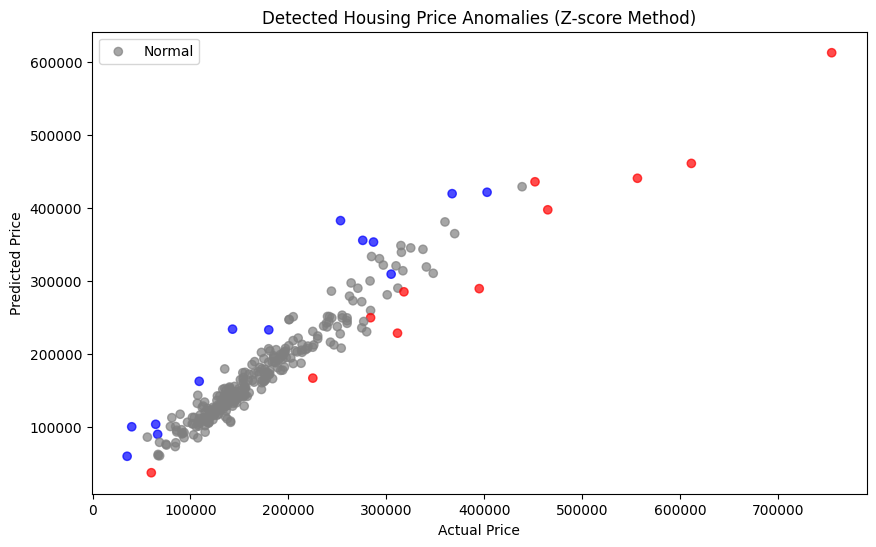

In [30]:
from models import detect_anomalies

anomalies_z = detect_anomalies(y_test, y_xgb_pred, method="ensemble")

anomalies_z.head(10)

anomalies_if = detect_anomalies(y_test, y_xgb_pred, method="isolation_forest", contamination=0.05)
anomalies_if.head(10)

plt.figure(figsize=(10,6))
plt.scatter(anomalies_z["Actual_Price"], anomalies_z["Predicted_Price"],
            c=np.where(anomalies_z["Ensemble_Label"]=="Normal", "gray",
            np.where(anomalies_z["Ensemble_Label"]=="Overpriced", "red", "blue")),
            alpha=0.7)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Detected Housing Price Anomalies (Z-score Method)")
plt.legend(["Normal", "Overpriced", "Underpriced"])
plt.show()

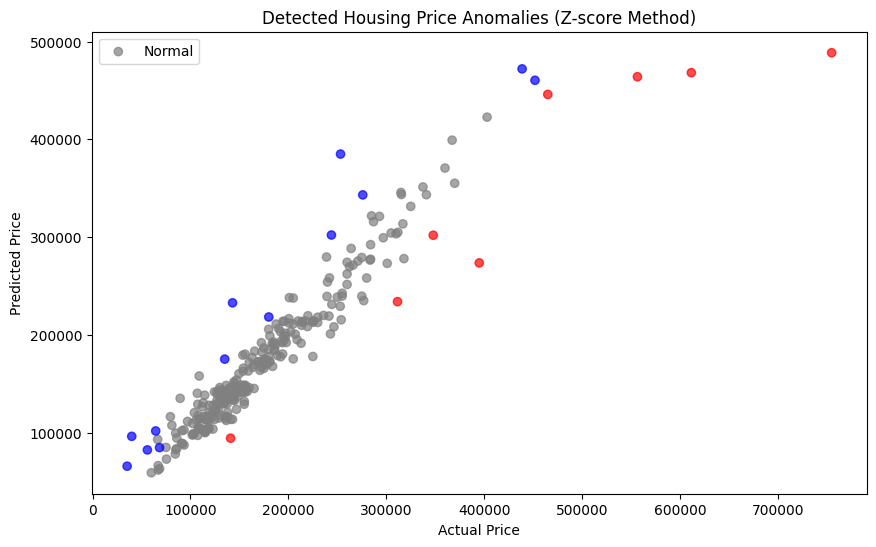

In [31]:
from models import detect_anomalies

anomalies_z = detect_anomalies(y_test, y_stacking_pred, method="ensemble")

anomalies_z.head(10)

anomalies_if = detect_anomalies(y_test, y_stacking_pred, method="isolation_forest", contamination=0.05)
anomalies_if.head(10)

plt.figure(figsize=(10,6))
plt.scatter(anomalies_z["Actual_Price"], anomalies_z["Predicted_Price"],
            c=np.where(anomalies_z["Ensemble_Label"]=="Normal", "gray",
            np.where(anomalies_z["Ensemble_Label"]=="Overpriced", "red", "blue")),
            alpha=0.7)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Detected Housing Price Anomalies (Z-score Method)")
plt.legend(["Normal", "Overpriced", "Underpriced"])
plt.show()